In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

## Support Vector Machine with S1 Pulse as Input
<br> Label NR as 1 and ER as 0
<br> Since each sample in the input has different length, I will fill 0 to make them the same length.
<br> 75% training data and 25% testing data
<br> Ignore depth dependence

In [2]:
NRpulses = pd.read_pickle('DD_S1pulse_raw.pickle')
ERpulses = pd.read_pickle('CH3T_S1pulse_raw.pickle')
NRS1 = np.array(NRpulses['S1pulse'])
ERS1 = np.array(ERpulses['S1pulse'])
NRlabel = [1]*len(NRS1)
ERlabel = [0]*len(ERS1)

In [3]:
NRlen = [len(x) for x in NRS1]
ERlen = [len(x) for x in ERS1]
maxNRlen = max(NRlen)
maxERlen = max(ERlen)
maxlen = max(maxNRlen,maxERlen)

NRlenpad = []
ERlenpad = []

for i in range(len(NRlen)):
    tem = np.array(list(NRS1[i])+list([0]*int(maxlen-NRlen[i])))
    NRlenpad.append(tem)
    
for i in range(len(ERlen)):
    tem = np.array(list(ERS1[i])+list([0]*int(maxlen-ERlen[i])))
    ERlenpad.append(tem)

In [4]:
pipe = make_pipeline(
    StandardScaler(),
        SVC())
X, y = list(NRlenpad)+list(ERlenpad), list(NRlabel)+list(ERlabel)
print("Total number of samples: "+str(len(X)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)

# we can now use it like any other estimator
print("Accuracy Score: "+str(round(accuracy_score(pipe.predict(X_test), y_test),2)))

Total number of samples: 11335
Accuracy Score: 0.7


In PSD, we are worried about the ER leakage. Therefore, we care more about whether there are ER events been labeled as NR events by the model. Based on the results below, 51% of ER events are labeled as NR by logistic regression model, a little better than logistic regression.

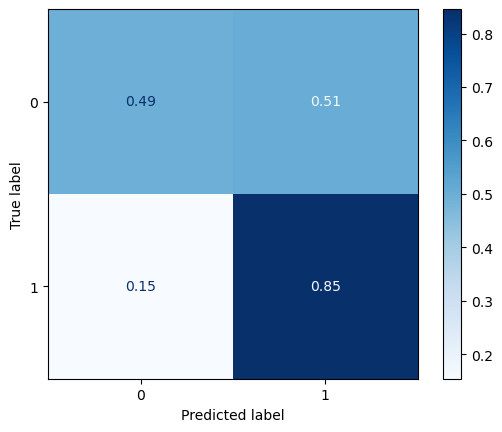

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
        pipe,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize='true',
    )

plt.show()

## Support Vector Machine with S1 Photon Timings as Input
<br> Label NR as 1 and ER as 0
<br> Since each sample in the input has different length, I will fill 10000 to make them the same length. I don't fill them with 0 since 0 means something in photon timings.
<br> For each S1, the reference time is the median.
<br> 75% training data and 25% testing data
<br> Ignore depth dependence

In [17]:
NRtimes = pd.read_pickle('DD_TimesForPulses_06152023.pkl')
ERtimes = pd.read_pickle('CH3T_TimesForPulses_06152023.pkl')
NRTiming = np.array(NRtimes['Times'])
ERTiming = np.array(ERtimes['Times'])
NRlabel = [1]*len(NRTiming)
ERlabel = [0]*len(ERTiming)

In [18]:
NRlen = [len(x) for x in NRTiming]
ERlen = [len(x) for x in ERTiming]
maxNRlen = max(NRlen)
maxERlen = max(ERlen)
maxlen = max(maxNRlen,maxERlen)

NRlenpad = []
ERlenpad = []

for i in range(len(NRlen)):
    tem = np.array(list(NRTiming[i])+list([10000]*int(maxlen-NRlen[i])))
    NRlenpad.append(tem)
    
for i in range(len(ERlen)):
    tem = np.array(list(ERTiming[i])+list([10000]*int(maxlen-ERlen[i])))
    ERlenpad.append(tem)

In [27]:
pipe = make_pipeline(
    StandardScaler(),
        SVC())
X, y = list(NRlenpad)+list(ERlenpad), list(NRlabel)+list(ERlabel)
print("Total number of samples: "+str(len(X)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)

# we can now use it like any other estimator
print("Accuracy Score: "+str(round(accuracy_score(pipe.predict(X_test), y_test),2)))

Total number of samples: 11335
Accuracy Score: 0.64


In PSD, we are worried about the ER leakage. Therefore, we care more about whether there are ER events been labeled as NR events by the model. Based on the results below, 48% of ER events are labeled as NR by logistic regression model. This overal accuracy is smaller than using S1 pulse as input, but less ER events are labeled as NR. Similar results as logistic regression.

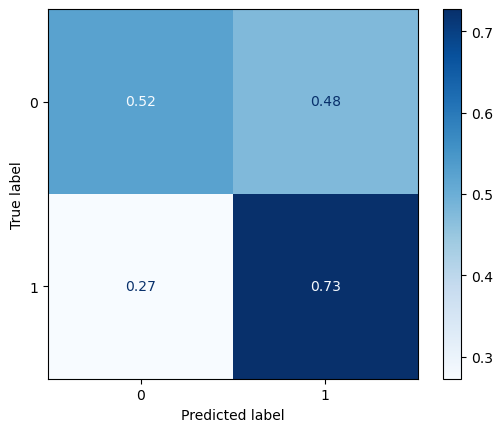

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
        pipe,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize='true',
    )

plt.show()